In [1]:
import mlflow
from mlflow.entities import ViewType
from IPython.display import Image
from PIL import Image
import matplotlib.pyplot as plt
import ast
import pandas as pd

In [2]:
mlflow.get_registry_uri()

'http://127.0.0.1:5000'

In [3]:
def getRunMetricsAndArtifacts(experimentName: str, runName: str):
    
    experiment = mlflow.get_experiment_by_name(experimentName)
    experiment_id = experiment.experiment_id
    
    run = mlflow.search_runs(experiment_ids=[experiment_id], filter_string=f"tags.mlflow.runName = '{runName}'")
    runID = run.iloc[0]['run_id']
    run_info = mlflow.get_run(runID)
    
    path = mlflow.artifacts.download_artifacts(
        run_id=runID, artifact_path="confusion_matrix.png"
    )

    metrics = run_info.data.metrics

    mean_precision = metrics.get('mean_precision')
    mean_recall = metrics.get('mean_recall')
    mean_f1 = metrics.get('mean_f1')
    
    return path, mean_precision, mean_recall, mean_f1

In [4]:
originalPathLevels, original_mean_precision_levels, original_mean_recall_levels, original_mean_f1_levels = getRunMetricsAndArtifacts("ORIGINAL_LEVELS", "original_levels")
originalPathCategories, original_mean_precision_categories, original_mean_recall_categories, original_mean_f1_categories = getRunMetricsAndArtifacts("ORIGINAL_CATEGORIES", "original_categories")

## Performance Comparison BERT with vs. without SMOTE (sampling strategy: not majority) and Spellchecked Relevance Dataset

## BERT First Stage (TORE Levels)

<function matplotlib.pyplot.show(close=None, block=None)>

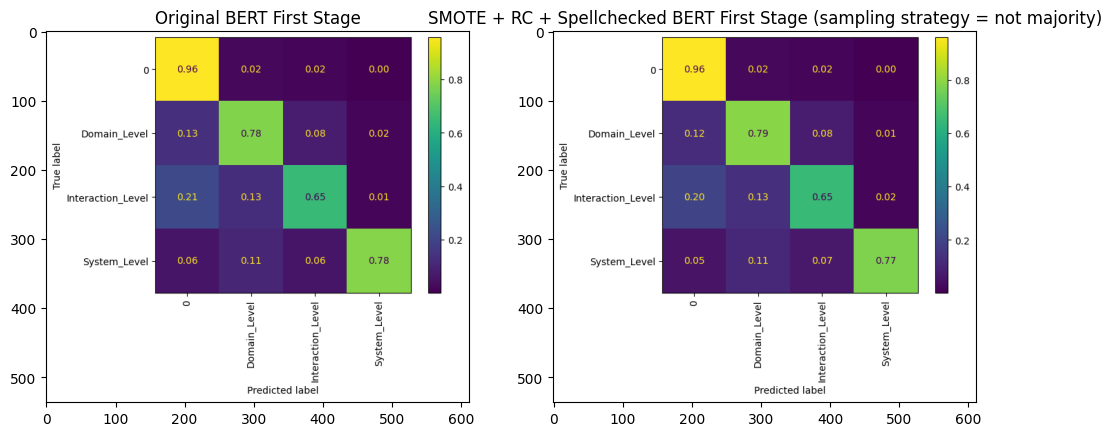

In [5]:
smoteRcSpellcheckedPath, smote_rc_spellchecked_mean_precision, smote_rc_spellchecked_mean_recall, smote_rc_spellchecked_mean_f1 = getRunMetricsAndArtifacts("SMOTE_RC_SPELLCHECKED_LEVELS", "smote_majority_rc_spellchecked_levels")

smote_image = Image.open(smoteRcSpellcheckedPath)
original_image = Image.open(originalPathLevels)

plt.figure(figsize=(12, 6))

# Plot original
plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title("Original BERT First Stage")

# Plot SMOTE
plt.subplot(1,2,2)
plt.imshow(smote_image)
plt.title("SMOTE + RC + Spellchecked BERT First Stage (sampling strategy = not majority)")

plt.show

In [6]:
data = {
    'Run': ['SMOTE_MAJORITY_RC_SPELLCHECKED_LEVELS', 'ORIGINAL_LEVELS'],
    'Mean Precision': [smote_rc_spellchecked_mean_precision, original_mean_precision_levels],
    'Mean Recall': [smote_rc_spellchecked_mean_recall, original_mean_recall_levels],
    'Mean F1': [smote_rc_spellchecked_mean_f1, original_mean_f1_levels]
}

df = pd.DataFrame(data)
df

,Run,Mean Precision,Mean Recall,Mean F1
0,SMOTE_MAJORITY_RC_SPELLCHECKED_LEVELS,0.821631,0.793954,0.807538
1,ORIGINAL_LEVELS,0.818994,0.792133,0.805312


## BERT E2E (TORE Categories)

<function matplotlib.pyplot.show(close=None, block=None)>

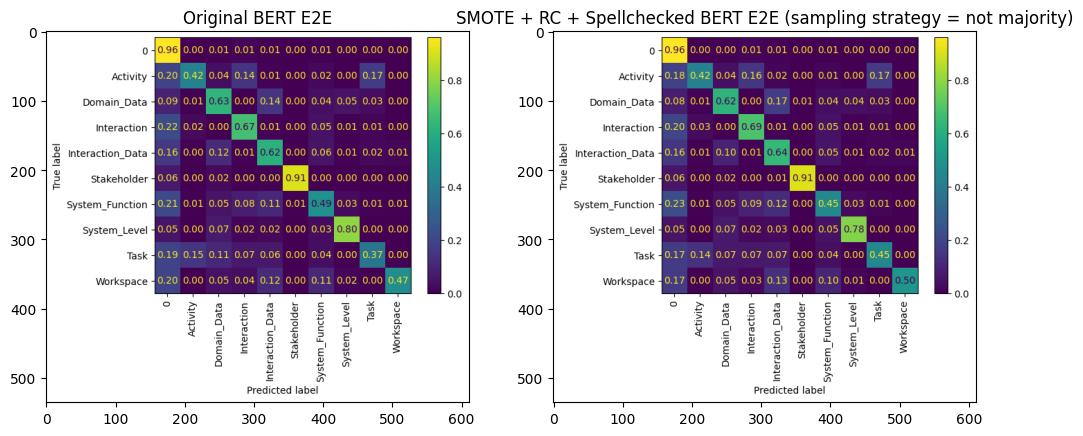

In [7]:
smoteRcSpellcheckedPath, smote_rc_spellchecked_mean_precision, smote_rc_spellchecked_mean_recall, smote_rc_spellchecked_mean_f1 = getRunMetricsAndArtifacts("SMOTE_RC_SPELLCHECKED_CATEGORIES", "smote_majority_rc_spellchecked_categories")

smote_image = Image.open(smoteRcSpellcheckedPath)
original_image = Image.open(originalPathCategories)

plt.figure(figsize=(12, 6))

# Plot original
plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title("Original BERT E2E")

# Plot SMOTE
plt.subplot(1,2,2)
plt.imshow(smote_image)
plt.title("SMOTE + RC + Spellchecked BERT E2E (sampling strategy = not majority)")

plt.show

In [8]:
data = {
    'Run': ['SMOTE_MAJORITY_RC_SPELLCHECKED_CATEGORIES', 'ORIGINAL_CATEGORIES'],
    'Mean Precision': [smote_rc_spellchecked_mean_precision, original_mean_precision_categories],
    'Mean Recall': [smote_rc_spellchecked_mean_recall, original_mean_recall_categories],
    'Mean F1': [smote_rc_spellchecked_mean_f1, original_mean_f1_categories]
}

df = pd.DataFrame(data)
df

,Run,Mean Precision,Mean Recall,Mean F1
0,SMOTE_MAJORITY_RC_SPELLCHECKED_CATEGORIES,0.686962,0.646839,0.666189
1,ORIGINAL_CATEGORIES,0.670642,0.634695,0.652106


## Performance Comparison BERT with vs. without SMOTE  (sampling strategy: minority) and Spellchecked Relevance Dataset

## BERT E2E (TORE Categories)

<function matplotlib.pyplot.show(close=None, block=None)>

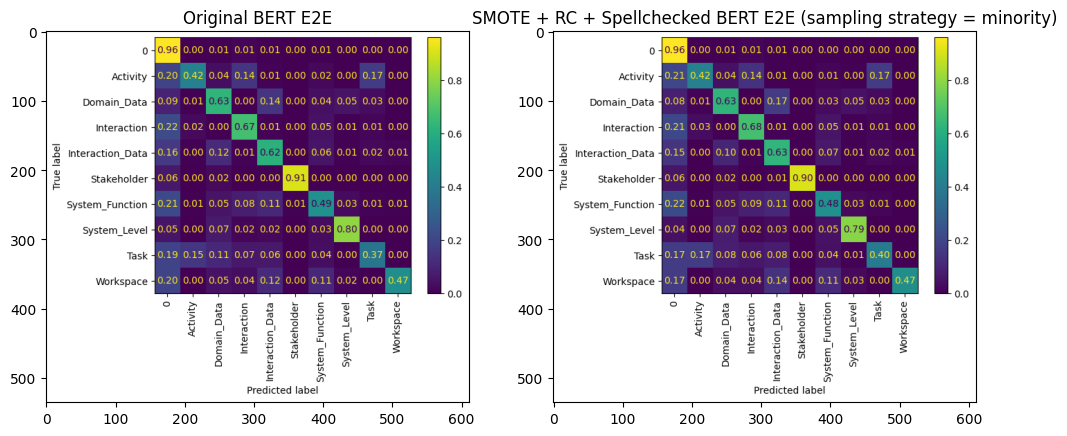

In [9]:
smoteRcSpellcheckedPath, smote_rc_spellchecked_mean_precision, smote_rc_spellchecked_mean_recall, smote_rc_spellchecked_mean_f1 = getRunMetricsAndArtifacts("SMOTE_RC_SPELLCHECKED_CATEGORIES", "smote_minority_rc_spellchecked_categories")

smote_image = Image.open(smoteRcSpellcheckedPath)
original_image = Image.open(originalPathCategories)

plt.figure(figsize=(12, 6))

# Plot original
plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title("Original BERT E2E")

# Plot SMOTE
plt.subplot(1,2,2)
plt.imshow(smote_image)
plt.title("SMOTE + RC + Spellchecked BERT E2E (sampling strategy = minority)")

plt.show

In [10]:
data = {
    'Run': ['SMOTE_MINORITY_RC_SPELLCHECKED_CATEGORIES', 'ORIGINAL_CATEGORIES'],
    'Mean Precision': [smote_rc_spellchecked_mean_precision, original_mean_precision_categories],
    'Mean Recall': [smote_rc_spellchecked_mean_recall, original_mean_recall_categories],
    'Mean F1': [smote_rc_spellchecked_mean_f1, original_mean_f1_categories]
}

df = pd.DataFrame(data)
df

,Run,Mean Precision,Mean Recall,Mean F1
0,SMOTE_MINORITY_RC_SPELLCHECKED_CATEGORIES,0.677257,0.639759,0.657964
1,ORIGINAL_CATEGORIES,0.670642,0.634695,0.652106


## Performance Comparison BERT with vs. without SMOTE  (sampling strategy: to average) and Spellchecked Relevance Dataset

## BERT E2E (TORE Categories)

<function matplotlib.pyplot.show(close=None, block=None)>

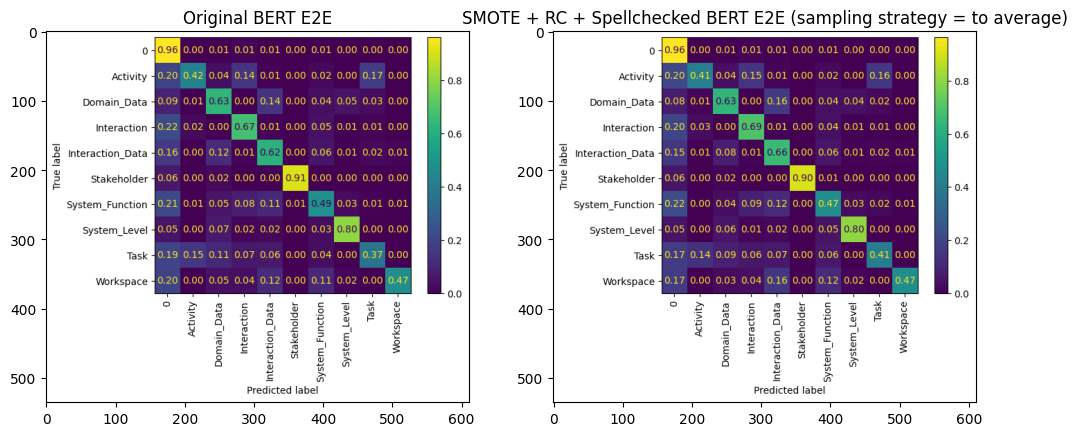

In [11]:
smoteRcSpellcheckedPath, smote_rc_spellchecked_mean_precision, smote_rc_spellchecked_mean_recall, smote_rc_spellchecked_mean_f1 = getRunMetricsAndArtifacts("SMOTE_RC_SPELLCHECKED_CATEGORIES", "smote_average_rc_spellchecked_categories")

smote_image = Image.open(smoteRcSpellcheckedPath)
original_image = Image.open(originalPathCategories)

plt.figure(figsize=(12, 6))

# Plot original
plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title("Original BERT E2E")

# Plot SMOTE
plt.subplot(1,2,2)
plt.imshow(smote_image)
plt.title("SMOTE + RC + Spellchecked BERT E2E (sampling strategy = to average)")

plt.show

In [12]:
data = {
    'Run': ['SMOTE_AVERAGE_RC_SPELLCHECKED_CATEGORIES', 'ORIGINAL_CATEGORIES'],
    'Mean Precision': [smote_rc_spellchecked_mean_precision, original_mean_precision_categories],
    'Mean Recall': [smote_rc_spellchecked_mean_recall, original_mean_recall_categories],
    'Mean F1': [smote_rc_spellchecked_mean_f1, original_mean_f1_categories]
}

df = pd.DataFrame(data)
df

,Run,Mean Precision,Mean Recall,Mean F1
0,SMOTE_AVERAGE_RC_SPELLCHECKED_CATEGORIES,0.687663,0.644721,0.665441
1,ORIGINAL_CATEGORIES,0.670642,0.634695,0.652106
